# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 16, 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [3]:
tfidf_vectorizer = TfidfVectorizer(min_df=30, stop_words='english')
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

In [4]:
# convert to array so it works with NMF
X = X.toarray()

## 2. NMF - Nonnegative Matrix Factorization

In [5]:
# <DONE> import proper class
from sklearn.decomposition import NMF

# <DONE> uncomment below. choose q that minimizes reconstruction error below (try a few values. no need to search exhaustively)
# NOTE: The error is decreasing monotonically for NMF thus
# choosing the whole feature space will lead to minimum
# reconstruction error.
# Taking the note above to account, we found that after
# trying a few q such as q=4, q=10, q=15 and so on that
# q = 10 performs the best, thus we choose q = 10.
q = 10

# <DONE> uncomment below. initialize NMF model
nmf = NMF(n_components=q)

# <DONE> uncomment below. train NMF model and retrieve the low-dimension projection of X.
# NOTE: The other options/hyperparameters are set to sklearn
# defaults for NMF.
nmf.fit(X)
Z = nmf.transform(X)

# <DONE> uncomment below. retrieve reconstruction error
error = nmf.reconstruction_err_

In [6]:
print ("Reconstruction error : {:.4f}".format(error))

Reconstruction error : 45.4413


In [7]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (2369, 1529)
Reduced Shape:  (2369, 10)


## 3. Visualizing the reduced data points

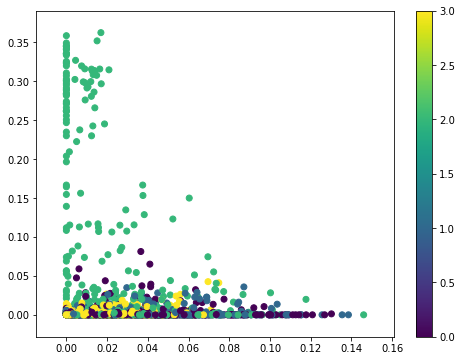

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c = y)
plt.colorbar()

## 4. Analysis

In [9]:
# <DONE> uncomment below. Retrieve W
W = nmf.components_

In [10]:
W.shape

(10, 1529)

In [11]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(W[i])

    print ('TOPIC ' + str(i))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

TOPIC 0
cwru lines subject organization state posting host nntp university edu

TOPIC 1
n3jxp cadre dsl shameful edu cs gordon banks geb pitt

TOPIC 2
church christian hell believe faith christ bible christians jesus god

TOPIC 3
video problem card monitor quadra scsi se drive apple mac

TOPIC 4
reaction foods berkeley steve dyer superstition chinese sensitivity food msg

TOPIC 5
intelligence aisun3 programs athens mcovingt covington michael uga georgia ai

TOPIC 6
host nntp posting hp ed writes article east sun com

TOPIC 7
org ac riding dog ride dod uk bnr ca bike

TOPIC 8
medical patients science doctor like know disease people time don

TOPIC 9
lady 1983 corn bike com zx chris nj nec behanna

